Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.DLQ60Y_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.DLQ60Y_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


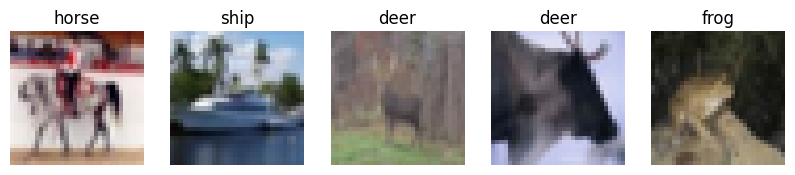

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
cifar10_dataset, cifar10_info = tfds.load('cifar10', split='train', with_info=True, as_supervised=True)

# Example: Display a few images and their labels
def display_images(dataset, num_images=5):
    plt.figure(figsize=(10, 2))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.numpy())
        plt.title(cifar10_info.features['label'].int2str(label.numpy()))
        plt.axis('off')
    plt.show()

# Display 5 images from the CIFAR-10 dataset
display_images(cifar10_dataset)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image for prompt: 'A fantasy landscape with mountains and a river'


  0%|          | 0/50 [00:00<?, ?it/s]

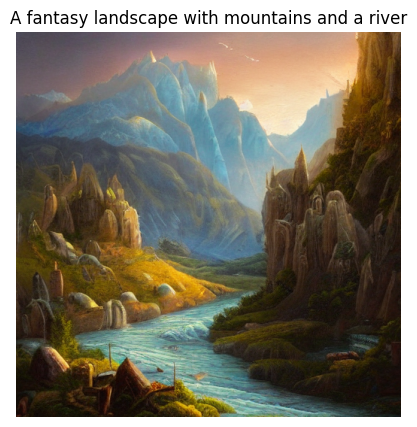

Generating image for prompt: 'A futuristic city skyline at sunset'


  0%|          | 0/50 [00:00<?, ?it/s]

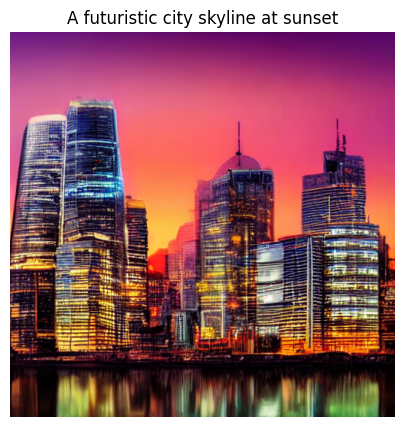

Generating image for prompt: 'A cute cat wearing a wizard hat'


  0%|          | 0/50 [00:00<?, ?it/s]

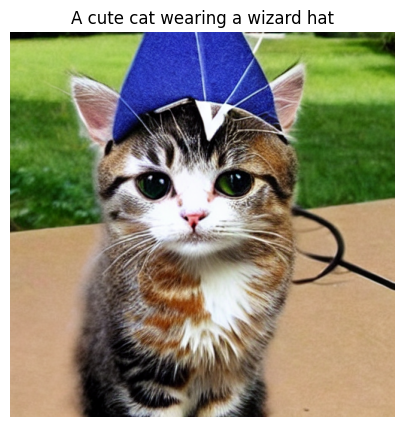

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Load the Stable Diffusion model without specifying torch_dtype
model_id = "CompVis/stable-diffusion-v1-4"  # You can use other model IDs as well
pipe = StableDiffusionPipeline.from_pretrained(model_id)  # Removed torch_dtype argument
pipe = pipe.to("cpu")  # Move the model to CPU

# Function to generate images from text prompts
def generate_images(prompt, num_images=1):
    images = pipe(prompt, num_images_per_prompt=num_images).images
    return images

# Example text prompts
prompts = [
    "A fantasy landscape with mountains and a river",
    "A futuristic city skyline at sunset",
    "A cute cat wearing a wizard hat",
]

# Generate and display images for each prompt
for prompt in prompts:
    print(f"Generating image for prompt: '{prompt}'")
    images = generate_images(prompt)

    # Display the generated images
    plt.figure(figsize=(5, 5))
    plt.imshow(images[0])
    plt.axis('off')
    plt.title(prompt)
    plt.show()